### Introduction

- The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. 
- This model is then used to identify whether a new transaction is fraudulent or not. An FDS runs at a credit card issuing bank. Each incoming transaction is submitted to the FDS for verification.

### Aim of Credit card fraud detection

- The key objective of any credit card fraud detection system is to identify suspicious events and report them to an analyst while letting normal transactions be automatically processed. 
- For years, financial institutions have been entrusting this task to rule-based systems that employ rule sets written by experts.

### Dataset Attributes

Dataset contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issue, we cannot provide the original features and more background information about the dataset. Features V1,V2,....V28 are the principal components obtained with PCA, the only features which have not transformed with PCA are 'time' and 'amount'. Featue 'time' contains the second elaped between each transaction and first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

- ID - A unique ID for each row.

- Time - Number of seconds elasped between this transaction and the first transaction in the dataset.

- V1-V28 - Features after dimensionality reduction to protect user identities and sensitive features.

- Amount - Transaction amount

- Class - Target Class

### Dataset

- Credit card fraud detection dataset downloaded from  https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
df=pd.read_csv('creditcard.csv')


### To view dataset

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Shape

In [4]:
df.shape

(284807, 31)

### null values

In [5]:
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum().sum()

0

### Field name

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### Data type

In [8]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### First 5 records

In [9]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Last 5 records

In [10]:
df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### information of dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Statistical information

In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Check duplicate values

In [13]:
df.duplicated().sum()

1081

In [14]:
df=df.drop_duplicates()

In [15]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [16]:
df.rename(columns={'Time':'Time Zone'},inplace=True)
df

,Time Zone,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Random lines

In [17]:
df.sample(5)

,Time Zone,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
153137,97981.0,-0.021324,-0.173443,0.524833,-2.814484,0.075985,-0.787523,0.060675,-0.319455,-1.490701,...,0.058274,0.825021,-0.327491,-0.358764,-0.129702,-0.094818,0.121437,0.144099,0.01,0
9418,13843.0,-0.965556,1.289669,1.674183,0.919512,0.006385,-0.079376,0.417655,0.226404,0.873758,...,-0.134087,0.176322,0.072284,0.398624,-0.644318,0.619952,-0.092997,-0.074716,15.25,0
42366,41074.0,1.134069,-0.226533,0.563352,0.081425,-0.322841,0.478288,-0.437448,0.314509,0.378808,...,-0.208468,-0.401672,0.149077,-0.225536,0.039201,0.883912,-0.036923,-0.012170,1.00,0
88919,62347.0,-0.564960,1.004740,0.910507,-0.101886,0.596849,-0.571179,0.688162,-0.093297,-0.356214,...,-0.308230,-0.770991,0.056055,-0.505538,0.006441,0.117124,0.139672,0.067742,2.58,0
93203,64296.0,1.242704,-0.055104,0.161076,-0.309001,-0.195038,-0.219040,-0.168755,0.080773,0.026728,...,-0.179858,-0.530021,0.095345,-0.264744,0.099239,0.881016,-0.077260,-0.014036,0.00,0


### Correlation

In [18]:
df.corr()

,Time Zone,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time Zone,1.000000,0.117927,-0.010556,-0.422054,-0.105845,0.173223,-0.063279,0.085335,-0.038203,-0.007861,...,0.045913,0.143727,0.051474,-0.015954,-0.233262,-0.041818,-0.005171,-0.009305,-0.010559,-0.012359
V1,0.117927,1.000000,0.006875,-0.008112,0.002257,-0.007036,0.000413,-0.009173,-0.001168,0.001828,...,0.002818,-0.001436,-0.001330,-0.000723,-0.000222,-0.000684,-0.015706,-0.004861,-0.230105,-0.094486
V2,-0.010556,0.006875,1.000000,0.005278,-0.001495,0.005210,-0.000594,0.007425,0.002899,-0.000274,...,-0.004897,0.001237,-0.003855,0.000701,-0.001569,0.000253,0.007555,0.001611,-0.533428,0.084624
V3,-0.422054,-0.008112,0.005278,1.000000,0.002829,-0.006879,-0.001511,-0.011721,-0.001815,-0.003579,...,0.003500,-0.000275,0.000449,-0.000072,0.000425,-0.000094,-0.007051,-0.000134,-0.212410,-0.182322
V4,-0.105845,0.002257,-0.001495,0.002829,1.000000,0.001744,-0.000880,0.004657,0.000890,0.002154,...,-0.001034,0.000115,0.000732,-0.000120,0.000162,0.000777,0.001322,0.000231,0.099514,0.129326
V5,0.173223,-0.007036,0.005210,-0.006879,0.001744,1.000000,-0.000938,-0.008709,0.001430,-0.001213,...,0.001622,-0.000559,0.001183,0.000198,0.000069,0.000390,-0.005798,-0.000820,-0.387685,-0.087812
V6,-0.063279,0.000413,-0.000594,-0.001511,-0.000880,-0.000938,1.000000,0.000436,0.003036,-0.000734,...,-0.002134,0.001104,-0.000755,0.001202,0.000697,-0.000028,0.000289,0.000925,0.216389,-0.043915
V7,0.085335,-0.009173,0.007425,-0.011721,0.004657,-0.008709,0.000436,1.000000,-0.006419,-0.004921,...,0.009010,-0.002280,0.003303,-0.000384,-0.000072,0.000624,-0.004537,0.001657,0.400408,-0.172347
V8,-0.038203,-0.001168,0.002899,-0.001815,0.000890,0.001430,0.003036,-0.006419,1.000000,0.001038,...,0.018892,-0.006156,0.004994,0.000113,0.000011,-0.001407,0.000613,-0.000099,-0.104662,0.033068
V9,-0.007861,0.001828,-0.000274,-0.003579,0.002154,-0.001213,-0.000734,-0.004921,0.001038,1.000000,...,0.000679,0.000785,0.000677,-0.000103,-0.000275,0.001253,0.008221,0.005591,-0.044123,-0.094021


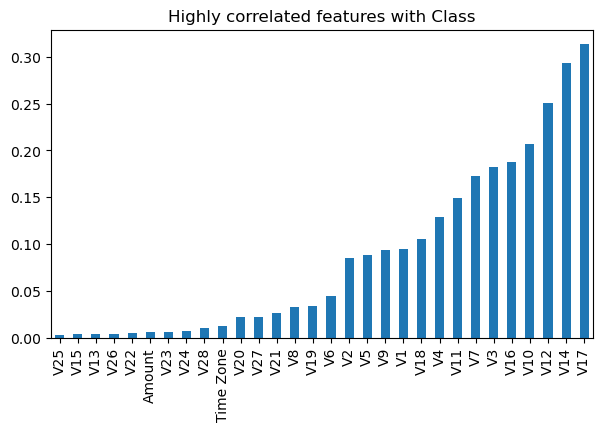

In [19]:
plt.figure(figsize=(7,4))
d = df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Highly correlated features with Class')

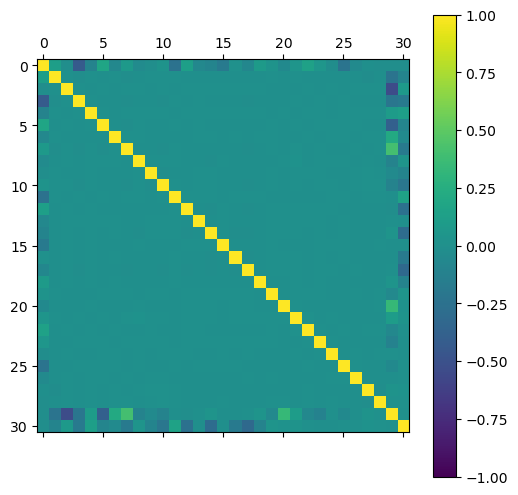

In [20]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()


 ### Covariant

In [21]:
df.cov()

,Time Zone,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time Zone,2.254450e+09,10907.541254,-825.310423,-30233.317533,-7107.160553,11325.631587,-4001.877710,4974.253249,-2138.715669,-408.915563,...,1578.108933,4944.564658,1524.355202,-458.777551,-5772.779294,-957.153660,-97.172643,-144.925555,-125536.378255,-23.940600
V1,1.090754e+04,3.794806,0.022054,-0.023840,0.006219,-0.018874,0.001071,-0.021938,-0.002683,0.003901,...,0.003973,-0.002027,-0.001616,-0.000853,-0.000226,-0.000642,-0.012108,-0.003106,-112.241834,-0.007509
V2,-8.253104e+02,0.022054,2.711631,0.013113,-0.003482,0.011814,-0.001304,0.015010,0.005629,-0.000494,...,-0.005838,0.001476,-0.003959,0.000699,-0.001347,0.000201,0.004923,0.000870,-219.950237,0.005685
V3,-3.023332e+04,-0.023840,0.013113,2.276121,0.006035,-0.014290,-0.003037,-0.021710,-0.003228,-0.005915,...,0.003822,-0.000300,0.000423,-0.000066,0.000334,-0.000069,-0.004210,-0.000066,-80.242788,-0.011222
V4,-7.107161e+03,0.006219,-0.003482,0.006035,1.999916,0.003397,-0.001658,0.008085,0.001485,0.003338,...,-0.001058,0.000118,0.000646,-0.000103,0.000119,0.000530,0.000740,0.000107,35.239110,0.007461
V5,1.132563e+04,-0.018874,0.011814,-0.014290,0.003397,1.896152,-0.001719,-0.014722,0.002323,-0.001830,...,0.001617,-0.000557,0.001016,0.000165,0.000050,0.000259,-0.003160,-0.000370,-133.674696,-0.004933
V6,-4.001878e+03,0.001071,-0.001304,-0.003037,-0.001658,-0.001719,1.774039,0.000713,0.004767,-0.001071,...,-0.002057,0.001065,-0.000628,0.000970,0.000484,-0.000018,0.000152,0.000404,72.168839,-0.002386
V7,4.974253e+03,-0.021938,0.015010,-0.021710,0.008085,-0.014722,0.000713,1.507159,-0.009292,-0.006619,...,0.008007,-0.002028,0.002529,-0.000286,-0.000046,0.000369,-0.002204,0.000667,123.087955,-0.008632
V8,-2.138716e+03,-0.002683,0.005629,-0.003228,0.001485,0.002323,0.004767,-0.009292,1.390169,0.001341,...,0.016125,-0.005259,0.003672,0.000080,0.000007,-0.000800,0.000286,-0.000038,-30.899728,0.001591
V9,-4.089156e+02,0.003901,-0.000494,-0.005915,0.003338,-0.001830,-0.001071,-0.006619,0.001341,1.200104,...,0.000538,0.000623,0.000462,-0.000068,-0.000157,0.000662,0.003564,0.002009,-12.103276,-0.004202


### statistic figures

In [22]:
df['Amount'].count()

283726

In [23]:
df['Class'].count()

283726

In [24]:
df['Amount'].mean()

88.47268731093956

In [25]:
df['V2'].count()

283726

In [26]:
df['Amount'].max()

25691.16

In [27]:
df['Amount'].min()

0.0

In [28]:
df['Amount'].std()

250.3994371158016

In [29]:
df['Amount'].var()

62699.87810791028

In [30]:
df.columns

Index(['Time Zone', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### EDA

### Count plot

<AxesSubplot:xlabel='Class', ylabel='count'>

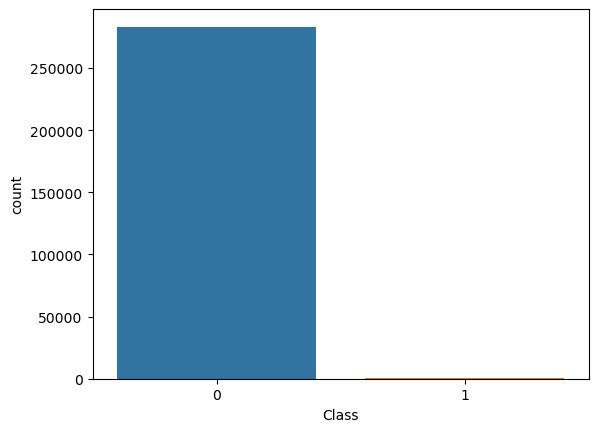

In [31]:
sns.countplot(x=df['Class'])

Observation - class is distribution with count.

### Pie Chart

Pie Chart:


Text(0, 0.5, '')

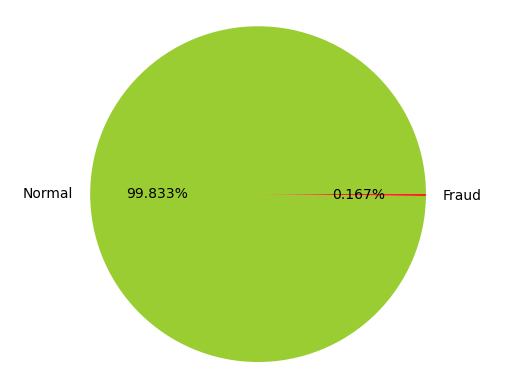

In [33]:
print("Pie Chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Class.value_counts(),autopct='%1.3f%%', labels=['Normal','Fraud'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

Observation - Fraud is minimum 

### Histrogram

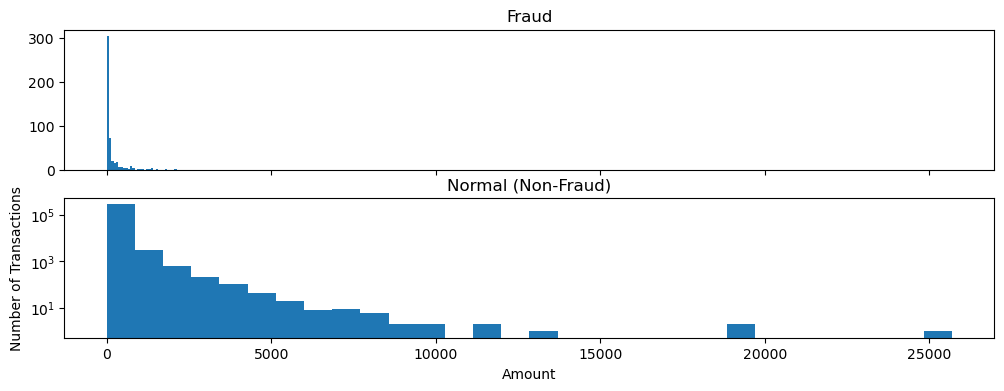

In [34]:
# now checking Amount in case of Fraud and Normal Transaction compared according to Number of transactions.

fig, (axis_1, axis_2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

axis_1.hist(df.Amount[df.Class == 1], bins = bins)
axis_1.set_title('Fraud')

axis_2.hist(df.Amount[df.Class == 0], bins = bins)
axis_2.set_title('Normal (Non-Fraud)')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale("log")
plt.show()


  Observation - we can see here that fraud transactions are of smaller amount. but this cant be used solely because normal transactions too have a lot of transactions of smaller amount.

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


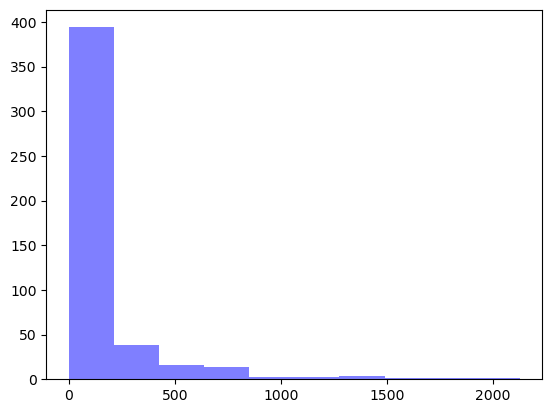

In [35]:
print(df.Amount[df.Class == 1 ].describe())
plt.hist(df.Amount[df.Class == 1 ], 10, facecolor='blue', alpha=0.5)
plt.show()

Observation - class is distributed with amount

 ### Exploring Train and Test Datasets

 - Observation in train dataset:
     - There are total of 32 columns: 0 categorical,1 id and 1 target column
     - There are 219129 rows
     - Class is the target variable
     - No missing values
- Observation in test dataset:
     - There are total of 31 columns: 30 continous, 0 categorical and 1 id 
     - There are 146087 rows
     - No missing values

### Train test split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
y = df.Class
X = df.drop('Class', axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [39]:
y_train.value_counts(normalize=True)

0    0.998332
1    0.001668
Name: Class, dtype: float64

In [40]:
y_test.value_counts(normalize=True)

0    0.998334
1    0.001666
Name: Class, dtype: float64

### Logistic Regressioin

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [44]:
log_reg = LogisticRegression()

In [45]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [46]:
y_pred = log_reg.predict(X_test)

In [47]:
log_reg_accuracy = accuracy_score(y_test, y_pred)*100

In [48]:
log_reg_accuracy

99.88678842251414

Logistic Regressioin accuracy - 99.88678842251414

### Random Forest

In [49]:
rfm = RandomForestClassifier(random_state=42)

In [50]:
rfm.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
rfm_pred = rfm.predict(X_test)

In [52]:
rfm = accuracy_score(y_test,y_pred)*100

In [53]:
rfm

99.88678842251414

Random Forest accuray - 99.88678842251414

### Ada Boost

In [54]:
ada = AdaBoostClassifier(random_state=42)


In [55]:
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [56]:
ada_pred = ada.predict(X_test)


In [57]:
ada=accuracy_score(y_test,y_pred)*100

In [58]:
ada

99.88678842251414

Ada Boost accuray - 99.88678842251414 

### Gradient Boosting

In [59]:
gb = GradientBoostingClassifier(random_state=42)


In [60]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [61]:
gb_pred = gb.predict(X_test)

In [62]:
gb = accuracy_score(y_test,y_pred)*100

In [63]:
gb

99.88678842251414

Gradient Boosting accuray - 99.88678842251414

In [64]:
gb_cm = confusion_matrix(y_test, gb_pred)


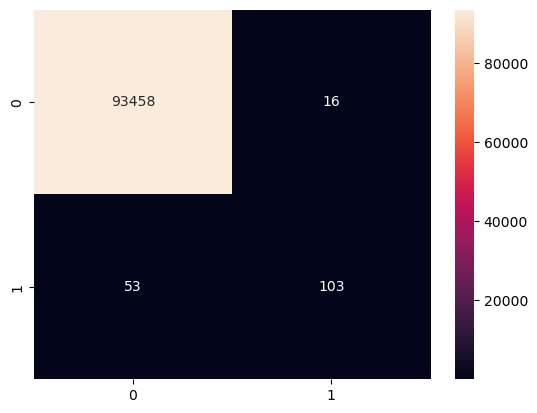

In [65]:
ax= plt.subplot()
sns.heatmap(gb_cm, annot=True, fmt='g', ax=ax);

### Machine Learning Model Comparison

In [66]:
Models = pd.DataFrame({'Model': [ 'LogisticRegression', 
 'RandomForestClassifier','AdaBoostClassifier','GradientBoostingClassifier'], 
 'Accuracy': [log_reg,rfm, ada , gb]})

In [67]:
Models

,Model,Accuracy
0,LogisticRegression,LogisticRegression()
1,RandomForestClassifier,99.886788
2,AdaBoostClassifier,99.886788
3,GradientBoostingClassifier,99.886788


### Conclusion

- The overall project discusses the problem of credit card fraud detection and how machine learning can be used to deal with it. As stated in methodology various machine learning algorithms are compared on the basis on accuracy.
- During analysis ’V14’ is found to be the most dominating feature when smote and adasyn are used as data balancing algorithm, also both of them are oversampling method, ’V17’ is found to be the most dominating feature when no data balancing algorithm is used. Most variation was observed in case of data balancing algorithm.